<a href="https://colab.research.google.com/github/memona008/Sign-Language-Digit-Classifier/blob/master/Sign_Language_Digits_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive, files
drive.mount('/gdrive',force_remount=True)
%cd /gdrive

Mounted at /gdrive
/gdrive


In [ ]:
!unzip "/gdrive/My Drive/Dataset.zip" -d "/Dataset"

In [3]:
!unzip "/gdrive/My Drive/Examples.zip" -d "/Examples"

Archive:  /gdrive/My Drive/Examples.zip
replace /Examples/Examples/example_0.JPG? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: /Examples/Examples/example_0.JPG  
  inflating: /Examples/Examples/example_1.JPG  
  inflating: /Examples/Examples/example_2.JPG  
  inflating: /Examples/Examples/example_3.JPG  
  inflating: /Examples/Examples/example_4.JPG  
  inflating: /Examples/Examples/example_5.JPG  
  inflating: /Examples/Examples/example_6.JPG  
  inflating: /Examples/Examples/example_7.JPG  
  inflating: /Examples/Examples/example_8.JPG  
  inflating: /Examples/Examples/example_9.JPG  


Imports

In [4]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import os 
import cv2
import random
from sklearn import datasets, metrics
from sklearn.model_selection import cross_validate, train_test_split



Using TensorFlow backend.


In [5]:
EXAMPLE = "Examples"
DATADIR = "Dataset"
CATEGORIES = ['0','1','2','3','4','5','6','7','8','9']
training_data = []

In [6]:
 for category in CATEGORIES:    
        path = "/{0}/{1}/{2}/".format(DATADIR, DATADIR, category)
    
        label = int(category) #label (in digit case the category itself is label)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                if img_array.shape[0] != 3024: 
                    training_data.append((img_array, label))
            except Exception as e: 
                print('........ERROR ...............')
                print(str(e))
                pass

In [7]:
print(len(training_data))

2059


In [8]:
  X=[]
  y=[]
  for features, label in training_data:
      X.append(features)
      # all_zeros = np.zeros((10))
      # all_zeros[label] = 1;
      y.append(label)



Splitting the data into Train & Test

In [9]:
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size=0.2, train_size=0.8)

In [10]:
X_train = np.array(X_train) / 255
X_test = np.array(X_test) / 255
y_train = np.array(y_train) 
y_test = np.array(y_test)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(1647, 100, 100) (1647,)
(412, 100, 100) (412,)


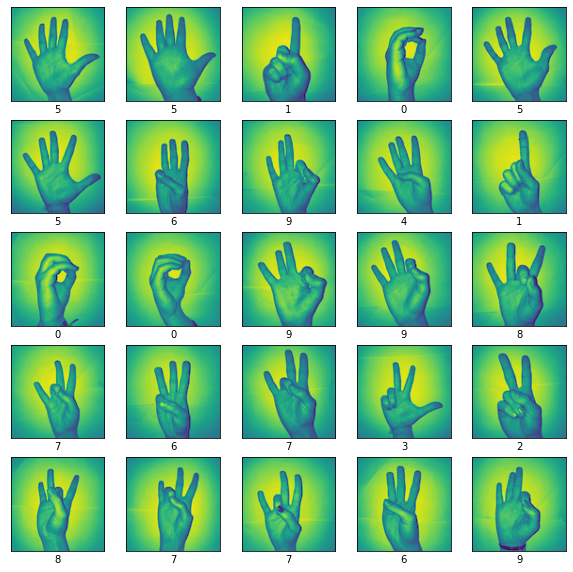

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    plt.xlabel(y_train[i])
plt.show()

CNN


In [53]:
model = keras.Sequential([
    keras.layers.Conv2D(filters = 16, input_shape= (100,100,1), data_format='channels_last', kernel_size = (5,5), strides=(1,1), padding='same', activation='relu' ),
    keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    keras.layers.Conv2D(filters = 32, kernel_size = (5,5), strides=(1,1), padding='same', activation='relu' ),
    keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    keras.layers.Conv2D(filters = 64, kernel_size = (3,3), strides=(1,1), padding='same', activation='relu' ),
    keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(512, activation='relu'),  
    keras.layers.Dense(10, activation='softmax')
])


In [54]:
model.compile(optimizer='adam',
              loss=keras.losses.categorical_crossentropy, # from_logits = False if softmax applied on last layer otherwise True
              metrics=['accuracy'])

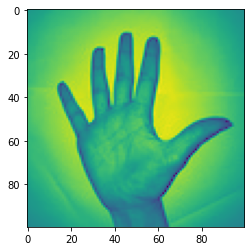

(1647, 100, 100, 1) (412, 100, 100, 1) (1647, 10) (412, 10)
Digit: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [55]:

plt.imshow(X_train[0])
plt.show()

trainX = X_train.reshape(list(X_train.shape) + [1]) 
testX = X_test.reshape(list(X_test.shape) + [1]) 
testY = keras.utils.to_categorical(y_test)
trainY = keras.utils.to_categorical(y_train)
print(trainX.shape, testX.shape, trainY.shape, testY.shape)
print("Digit: {0}".format(trainY[0]))

In [56]:
model.fit( x= trainX, y= trainY, epochs=20, verbose=2, batch_size=32, validation_data=(testX, testY))

Train on 1647 samples, validate on 412 samples
Epoch 1/20
 - 1s - loss: 2.2593 - accuracy: 0.1524 - val_loss: 1.6282 - val_accuracy: 0.4199
Epoch 2/20
 - 1s - loss: 1.1001 - accuracy: 0.6272 - val_loss: 0.7067 - val_accuracy: 0.7743
Epoch 3/20
 - 1s - loss: 0.6758 - accuracy: 0.7699 - val_loss: 0.4449 - val_accuracy: 0.8568
Epoch 4/20
 - 1s - loss: 0.4280 - accuracy: 0.8591 - val_loss: 0.4964 - val_accuracy: 0.8374
Epoch 5/20
 - 1s - loss: 0.3234 - accuracy: 0.8889 - val_loss: 0.2836 - val_accuracy: 0.9005
Epoch 6/20
 - 1s - loss: 0.2326 - accuracy: 0.9259 - val_loss: 0.2549 - val_accuracy: 0.9150
Epoch 7/20
 - 1s - loss: 0.1748 - accuracy: 0.9429 - val_loss: 0.2815 - val_accuracy: 0.9150
Epoch 8/20
 - 1s - loss: 0.1493 - accuracy: 0.9502 - val_loss: 0.2429 - val_accuracy: 0.9199
Epoch 9/20
 - 1s - loss: 0.1252 - accuracy: 0.9539 - val_loss: 0.1967 - val_accuracy: 0.9466
Epoch 10/20
 - 1s - loss: 0.1204 - accuracy: 0.9599 - val_loss: 0.2236 - val_accuracy: 0.9345
Epoch 11/20
 - 1s - lo

In [48]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 100, 100, 16)      416       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 50, 50, 32)        12832     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 25, 25, 64)        18496     
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 9216)             